# Preprocessing
Parse and clean fMRI data before running searchlight analysis

In [1]:
# Import dependencies
import numpy as np
import nibabel as nib # load nifti files
import glob # load files from a directory
from nilearn import image, plotting
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score


In [2]:
# define paths
import os

data_path = "../data"
results_path = "../results"

In [4]:
def load_data(data_path):
    """
    Load all fMRI data from the data directory
    """
    # Check if the data path exists
    if not os.path.exists(data_path):
        raise ValueError("Data path does not exist")
    
    dataset = []
    data_path = os.path.join(data_path, '')
    pattern = os.path.join(data_path, 'sub-*/func/*.nii.gz')
    files = glob.glob(pattern)

    # Check if the file exists
    if not files:
        raise FileNotFoundError("No files found in the {pattern}")
    
    for file in files:
        try:
            img = nib.load(file)
            dataset.append(img)
            print(f"Successfully loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {str(e)}")
            continue
    
    if not dataset:
        raise ValueError("No valid NIfTI files found in the {pattern}")
        
    return dataset

# load datasets
data_path_audio = "../data/audio"
data_path_visual = "../data/visual"

dataset_audio = load_data(data_path_audio)
dataset_visual = load_data(data_path_visual)

print(len(dataset_audio)) 
print(dataset_audio[0])

print(len(dataset_visual))
print(dataset_visual[0])



Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-03_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-06_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-05_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-02_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-08_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-01_bold.nii.gz
Successfully loaded: ../data/audio/sub-01/func/sub-01_task-auditory_run-04_bold.nii.gz
Successfully loaded: ../data/visual/sub-213/func/sub-213_task-Conj9Inh_acq-a_bold.nii.gz
Successfully loaded: ../data/visual/sub-213/func/sub-213_task-Feat9Inh_acq-b_bold.nii.gz
Successfully loaded: ../data/visual/sub-213/func/sub-213_task-Conj19Sel_acq-a_bold.nii.gz
Successfully loaded: ../data/visual/sub-213/func/sub-213_task-Conj1Inh_acq-a_bold.nii.gz
Successfully loaded: ../data/visua

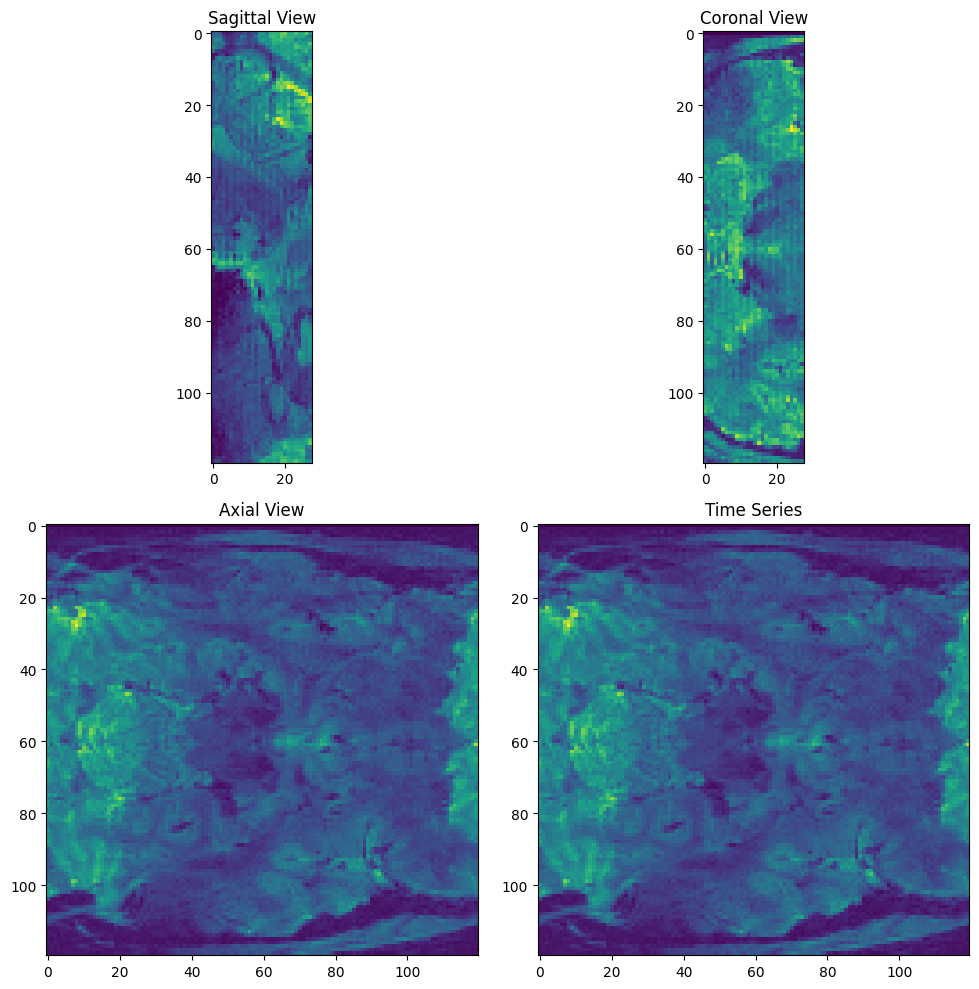

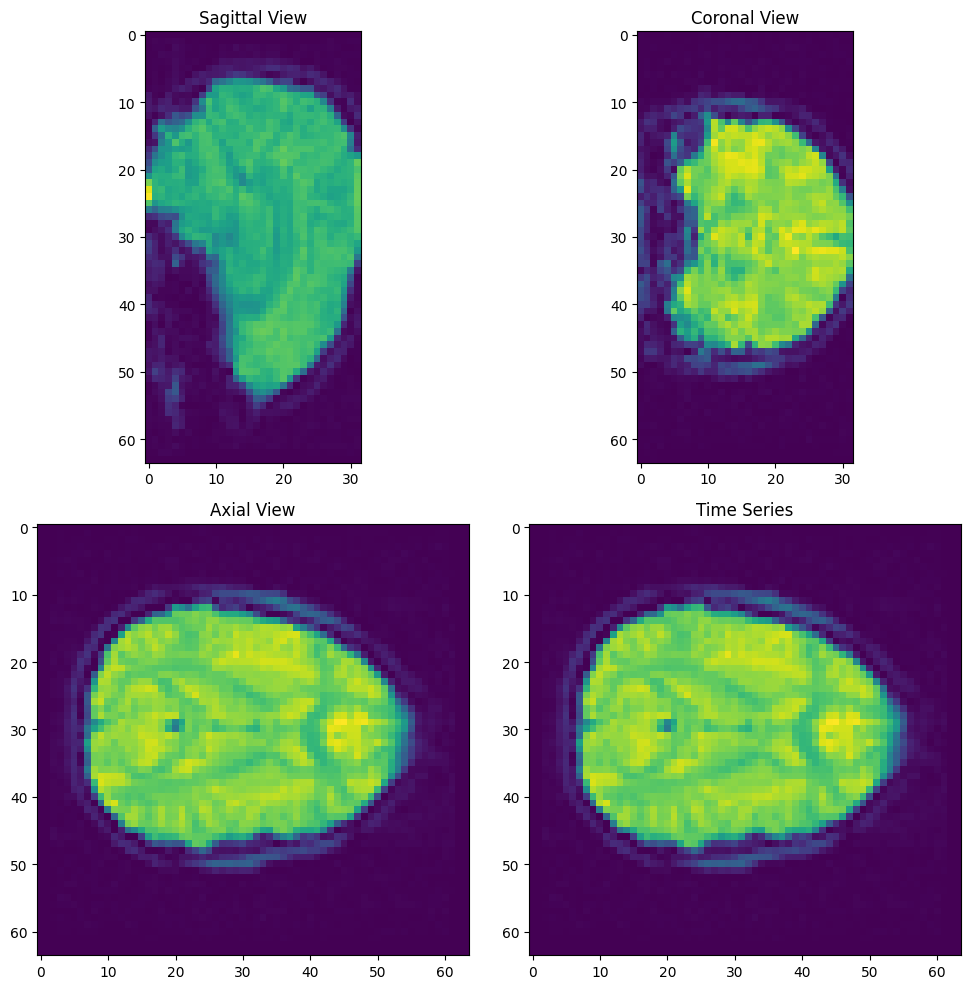

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  1.,  1., ...,  1.,  1.,  2.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  2.,  0., ...,  2.,  1.,  1.]],

        [[ 4., 11.,  6., ..., 10.,  8., 12.],
         [ 7., 14.,  2., ...,  7.,  6.,  4.],
         [ 7.,  6., 14., ...,  4.,  8.,  6.],
         ...,
         [ 1.,  3.,  3., ...,  5.,  3., 10.],
         [ 5., 11.,  7., ...,  9.,  5., 14.],
         [ 5., 11.,  5., ..., 16.,  5.,  9.]],

        ...,

        [[ 7.,  6., 11., ...,  3.,  8., 11.],
         [ 6.,  3., 10., ...,  3., 11.,  3.],
         [ 6.,  2.

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
def visualize_data(data):
    """
    Visualize the data using nilearn's plotting functions
    """
    # Extract the data array and affine matrix from the nifti object
    data_array = data.get_fdata()
    affine = data.affine

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    x, y, z, t = data_array.shape
    middle_x = x // 2 # get the middle slice in the x direction
    middle_y = y // 2
    middle_z = z // 2
    middle_t = t // 2

    # Plot views at a middle timepoint
    axes[0, 0].imshow(data_array[middle_x, :, :, middle_t])
    axes[0, 0].set_title('Sagittal View')

    axes[0, 1].imshow(data_array[:, middle_y, :, middle_t])
    axes[0, 1].set_title('Coronal View')

    axes[1, 0].imshow(data_array[:, :, middle_z, middle_t])
    axes[1, 0].set_title('Axial View')

    axes[1, 1].imshow(data_array[:, :, middle_z, middle_t])
    axes[1, 1].set_title('Time Series')

    plt.tight_layout()
    plt.show()

    return data_array

visualize_data(dataset_audio[0])
visualize_data(dataset_visual[0])


### Clean Data
We will run the following cleaning steps:
1. Smooth the data
2. Detrend the data
3. Remove motion outliers

Cleaned Visual Data
Smoothed Data
Data shape: 64 x 64 x 32 x 156


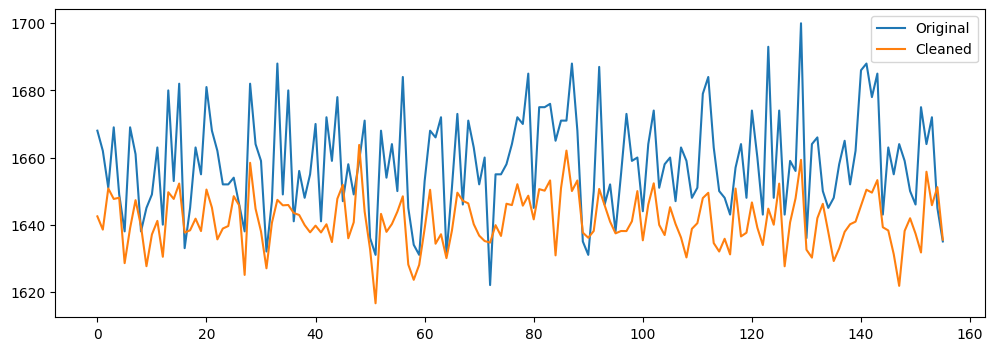

Detrended Data
Data shape: 64 x 64 x 32 x 156


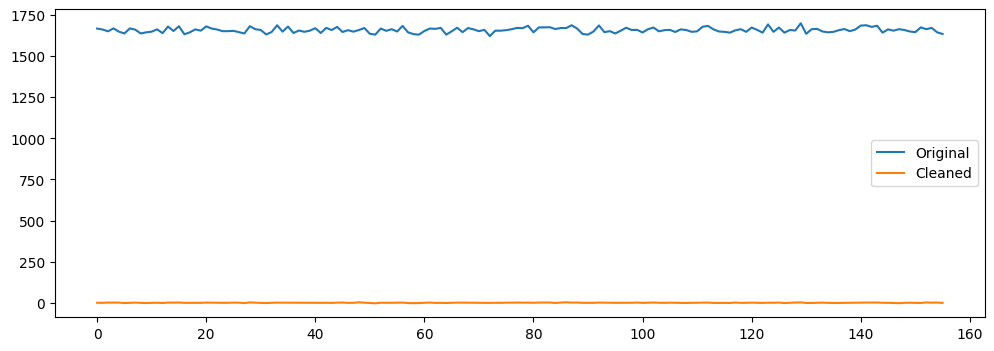

Motion Outliers Removed Data
Data shape: 64 x 64 x 32 x 156


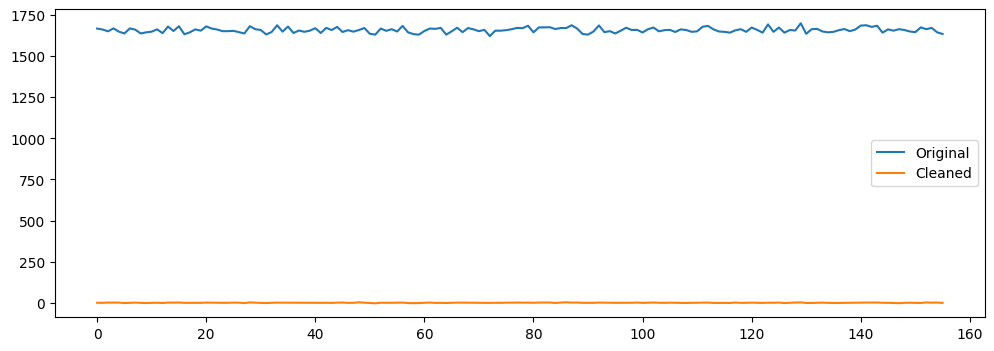

Data shape: 64 x 64 x 32 x 156


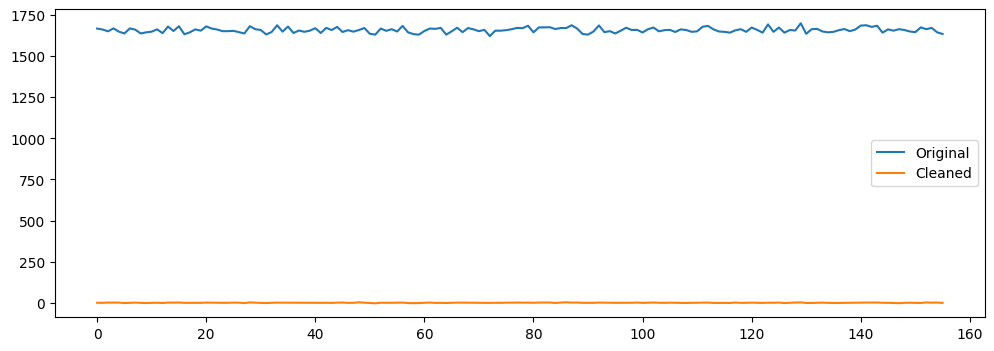

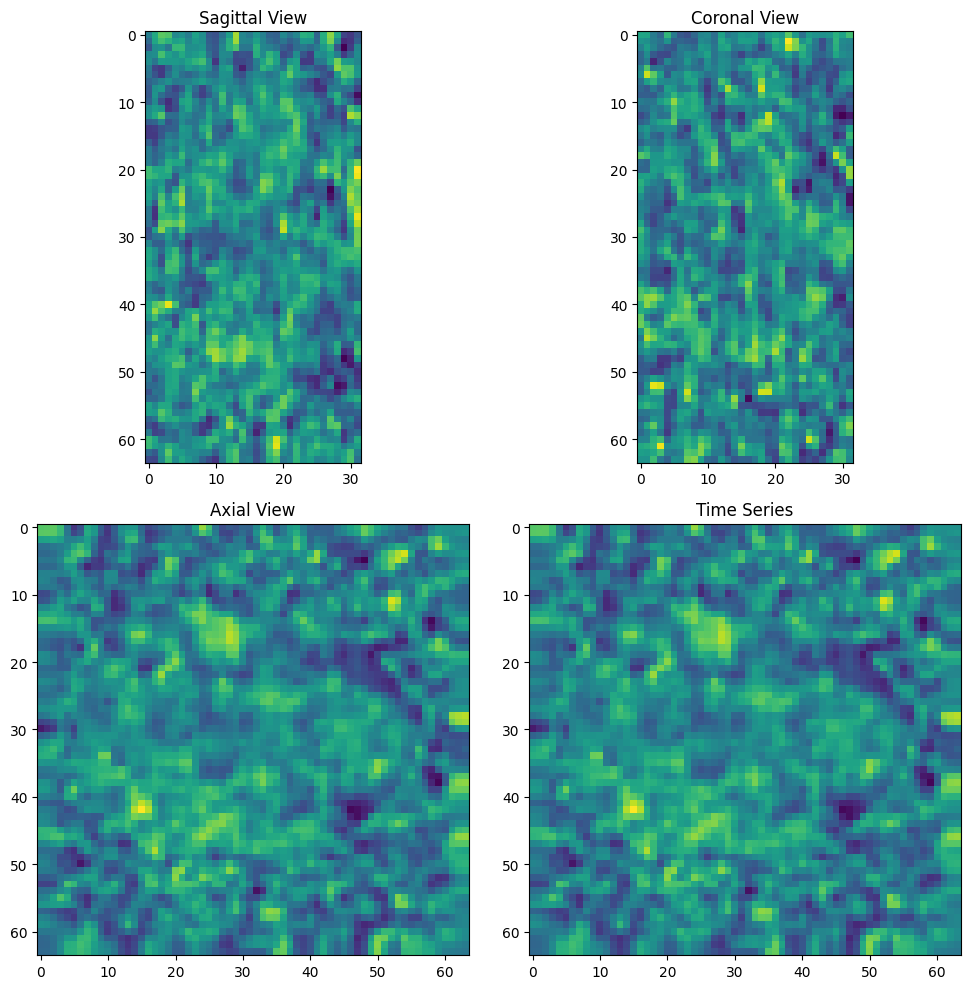

Cleaned Audio Data
Smoothed Data
Data shape: 120 x 120 x 28 x 200


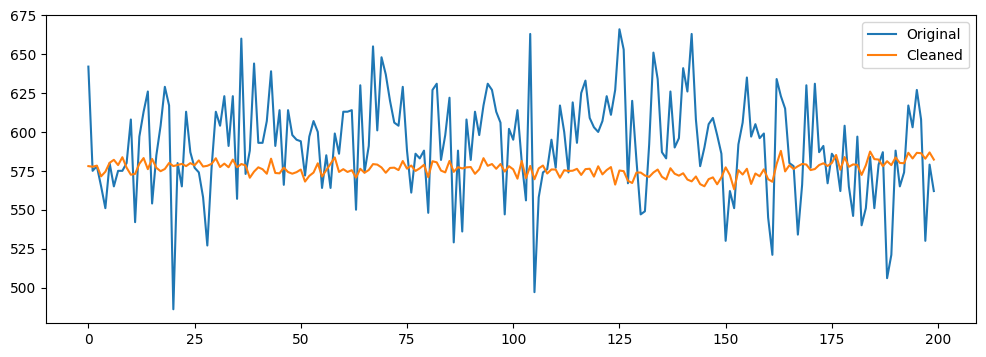

Detrended Data
Data shape: 120 x 120 x 28 x 200


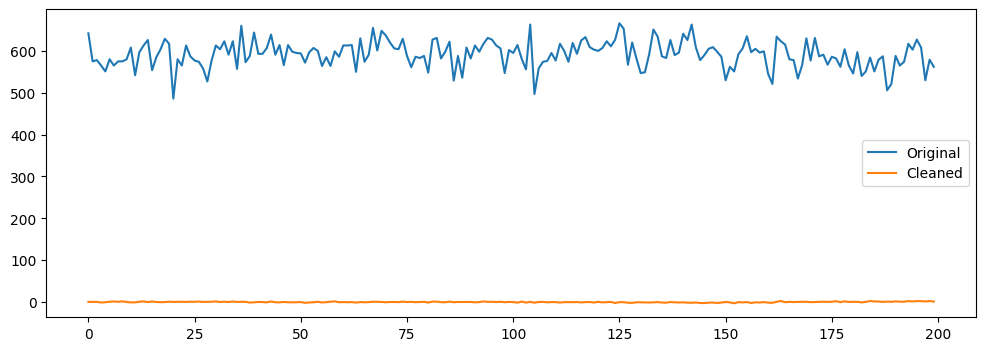

Motion Outliers Removed Data
Data shape: 120 x 120 x 28 x 200


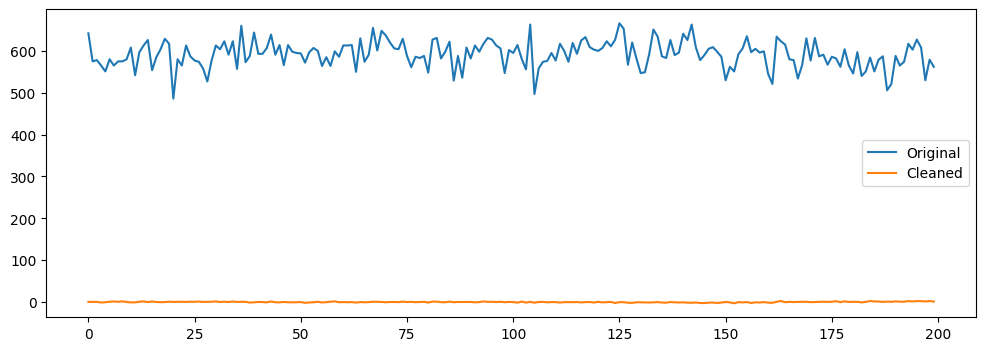

Data shape: 120 x 120 x 28 x 200


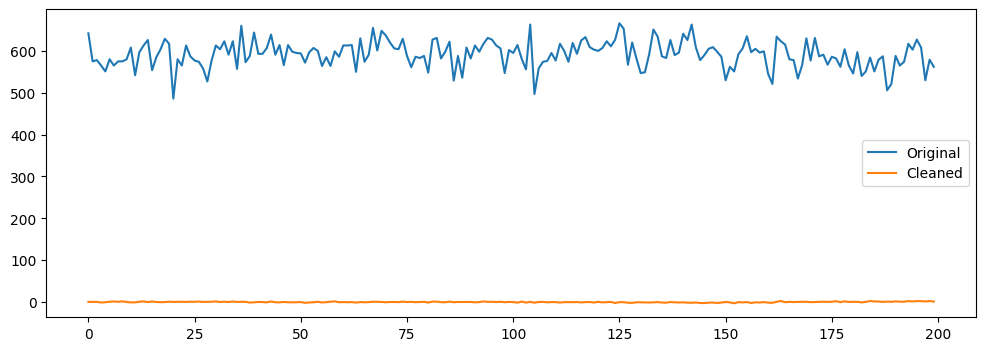

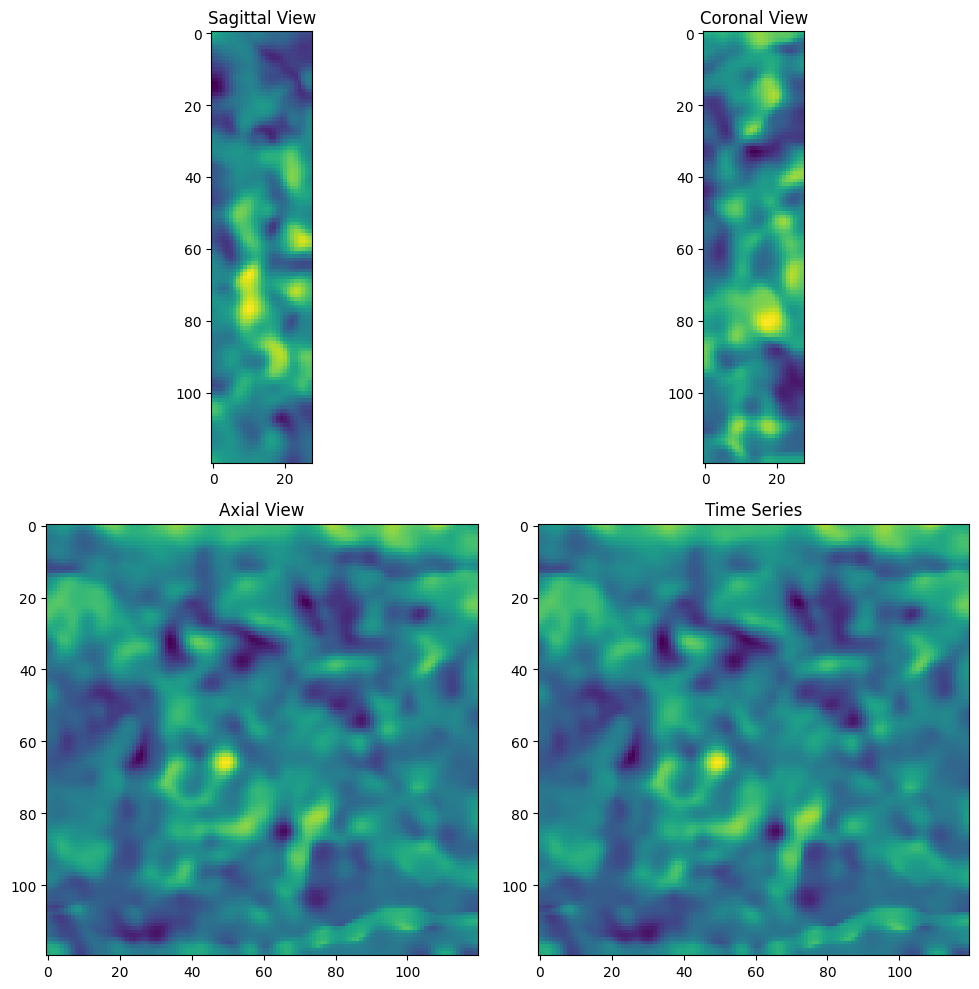

array([[[[ 8.78677607e-01, -5.04289865e-01, -1.50747627e-01, ...,
          -1.23004425e+00,  4.60563540e-01, -7.20872939e-01],
         [ 9.52507496e-01, -3.30006123e-01, -2.52773374e-01, ...,
          -1.49839950e+00,  4.41633373e-01, -5.91845870e-01],
         [ 1.11445332e+00, -8.65135051e-04, -3.88805658e-01, ...,
          -1.93188334e+00,  3.62581521e-01, -3.28641564e-01],
         ...,
         [-4.95262146e-01,  9.98081028e-01,  1.42869920e-01, ...,
          -4.67032105e-01, -3.92975777e-01, -1.25572348e+00],
         [-1.18904126e+00,  8.61597955e-01, -7.39623532e-02, ...,
          -2.71456391e-01, -1.61279067e-01, -1.14789510e+00],
         [-1.49422836e+00,  7.33353138e-01, -1.75321773e-01, ...,
          -1.84737697e-01, -4.48639430e-02, -1.05863464e+00]],

        [[ 7.16825306e-01, -5.55814028e-01, -1.29284367e-01, ...,
          -1.02313483e+00,  5.95973790e-01, -4.74829376e-01],
         [ 7.91995287e-01, -3.85125786e-01, -1.83441550e-01, ...,
          -1.27713609e

In [13]:
from nilearn import image as nli
from nilearn import plotting
import pandas as pd

def smooth_data(resampled_data, data):
    """
    Smooth the data by applying a Gaussian filter
    """
    smoothed_data = nli.smooth_img(resampled_data, fwhm=6)

    print("Smoothed Data")
    plot_data(smoothed_data, data)

    return smoothed_data

def detrend_data(smoothed_data, data):
    """
    Detrend the data by removing frequency noise
    """
    TR = smoothed_data.header['pixdim'][4] # get the reptition time from the header
    func_d= nli.image.clean_img(smoothed_data, detrend=True, standardize=True, t_r=TR, confounds=None)

    print("Detrended Data")
    plot_data(func_d, data)

    return func_d

def remove_motion_outliers(func_d, data):
    """
    Remove motion outliers from the data
    """
    # extract time series data from tsv files
    tsv_files = glob.glob(os.path.join(data_path, 'sub-*/func/*.tsv'))

    # initialize cleaned data as the detrended data
    cleaned_data = func_d

    for tsv_file in tsv_files:
        try:
            ts_confounds = pd.read_csv(tsv_file, sep='\t')
            # extract the motion parameters
            motion_params = ts_confounds[['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
            # regress the motion parameters from the data
            cleaned_data = nli.clean_img(func_d, confounds = motion_params)          
        except Exception as e:
            print(f"Error processing {tsv_file}: {str(e)}")
            continue

    print("Motion Outliers Removed Data")
    plot_data(cleaned_data, data)

    return cleaned_data

def plot_data(cleaned_data, data):
    """
    Plot data samples
    """

    x, y, z, t = cleaned_data.shape
    print(f"Data shape: {x} x {y} x {z} x {t}")

    # Retrieve middle points
    mid_x = x // 2
    mid_y = y //2 
    mid_z = z // 2
    mid_t = t // 2

    # Plot the time series at the middle points
    plt.figure(figsize=(12, 4))
    plt.plot(np.transpose(data.get_fdata()[mid_x, mid_y, mid_z, :]))
    plt.plot(np.transpose(cleaned_data.get_fdata()[mid_x, mid_y, mid_z, :]))
    plt.legend(['Original', 'Cleaned'])
    plt.show()

    return cleaned_data

def clean_data(data):
    """
    Clean the data by removing artifacts and normalizing the data
    """
    # Step 1: Compute the mean image and resample data
    mean_img = nli.mean_img(data)
    resampled_data = nli.resample_to_img(data, mean_img)
    
    # Step 2: Apply spatial smoothing
    smoothed_data = smooth_data(resampled_data, data)
    
    # Step 3: Detrend and standardize the data
    detrended_data = detrend_data(smoothed_data, data)
    
    # Step 4: Remove motion outliers
    motion_outliers_removed_data = remove_motion_outliers(detrended_data, data)
    cleaned_data = motion_outliers_removed_data

    # plot the data
    plot_data(cleaned_data, data)

    return cleaned_data


print("Cleaned Visual Data")
clean_data_visual = clean_data(dataset_visual[0])
visualize_data(clean_data_visual)
print("Cleaned Audio Data")
clean_data_audio = clean_data(dataset_audio[0])
visualize_data(clean_data_audio)

In [14]:
# save the cleaned data
nib.save(clean_data_visual, "../results/visual/cleaned_data_visual.nii.gz")
nib.save(clean_data_audio, "../results/audio/cleaned_data_audio.nii.gz")
print("Audio data shape: ", clean_data_audio.shape)
print("Visual data shape: ", clean_data_visual.shape)

Audio data shape:  (120, 120, 28, 200)
Visual data shape:  (64, 64, 32, 156)
